In [53]:
#调取必要的库
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random
import torch

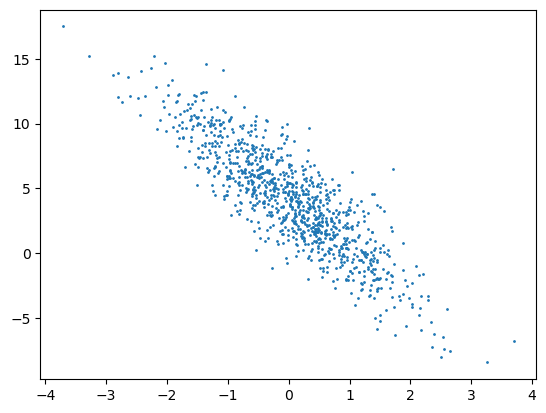

TypeError: 'list' object is not callable

In [61]:
#生成数据集
#生成一个产生随机数的函数
    #这个函数需要哪些参数呢y = Xw+b+σ,噪声σ默认符合正态分布（默认均值为0，std = 0.01）可以随机生成；还需要确定生成随机数的数目num_examples
    #w是一个list，决定了X的大小
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,size = (num_examples,len(w)))
    y = torch.matmul(X,w)+b
    y += torch.normal(0,0.01,size = y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)
plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)
plt.show()

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(0,num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

In [57]:
#读取数据集
#训练模型时需要遍历数据集，每次取一小批进行模型训练，更新模型
#需要定义一个函数，打乱数据集，并且以小批量的样本提取数据
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]
batch_size = 10
for X , y in data_iter(batch_size, features, labels):
    print(X,'\n',y)
    break

TypeError: 'list' object is not callable

In [56]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

TypeError: 'list' object is not callable

In [58]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

TypeError: 'list' object is not callable

In [62]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# 示例数据
features = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0], [7.0, 8.0], [9.0, 10.0]])
labels = torch.tensor([0, 1, 0, 1, 0])

# 创建 TensorDataset
dataset = TensorDataset(features, labels)

# 创建 DataLoader
batch_size = 2
is_train = True  # 是否在每个迭代周期内打乱数据
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=is_train)

# 使用数据迭代器
for epoch in range(3):  # 假设训练 3 个周期
    print(f"Epoch {epoch + 1}")
    for X, y in data_loader:
        print(X, '\n', y)

Epoch 1
tensor([[ 9., 10.],
        [ 1.,  2.]]) 
 tensor([0, 0])
tensor([[7., 8.],
        [5., 6.]]) 
 tensor([1, 0])
tensor([[3., 4.]]) 
 tensor([1])
Epoch 2
tensor([[ 3.,  4.],
        [ 9., 10.]]) 
 tensor([1, 0])
tensor([[7., 8.],
        [5., 6.]]) 
 tensor([1, 0])
tensor([[1., 2.]]) 
 tensor([0])
Epoch 3
tensor([[3., 4.],
        [5., 6.]]) 
 tensor([1, 0])
tensor([[ 9., 10.],
        [ 1.,  2.]]) 
 tensor([0, 0])
tensor([[7., 8.]]) 
 tensor([1])


In [65]:
help(TensorDataset)

Help on class TensorDataset in module torch.utils.data.dataset:

class TensorDataset(Dataset)
 |  TensorDataset(*tensors: torch.Tensor) -> None
 |
 |  Dataset wrapping tensors.
 |
 |  Each sample will be retrieved by indexing tensors along the first dimension.
 |
 |  Args:
 |      *tensors (Tensor): tensors that have the same size of the first dimension.
 |
 |  Method resolution order:
 |      TensorDataset
 |      Dataset
 |      typing.Generic
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __getitem__(self, index)
 |
 |  __init__(self, *tensors: torch.Tensor) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __len__(self)
 |
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |
 |  __annotations__ = {'tensors': typing.Tuple[torch.Tensor, ...]}
 |
 |  __orig_bases__ = (torch.utils.data.dataset.Dataset[typing.Tuple[torch....
 |
 |  __parameters__ = ()
 |
 |  ------------